In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
data = np.load('data.npy')

In [3]:
target = np.load('target.npy')
target = tf.keras.utils.to_categorical(target) # converting [1,0,1,1,0...] to [[1,0],[0,1],[1,0]] i.e categorical
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

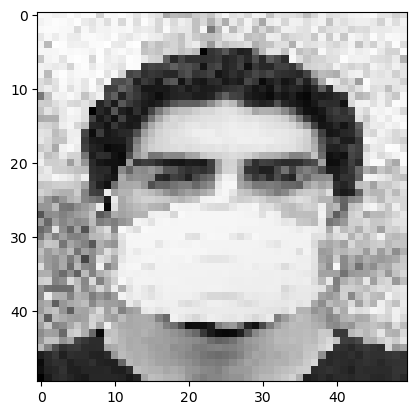

In [4]:
plt.imshow(data[890],cmap='gray')

In [5]:
target[890]

array([0., 1.])

In [6]:
# we need to create a 3D image since our image have only one channel as its a greyscale img.
# so we will just replicate the image 3 times to create a 3d image.
# https://www.tensorflow.org/api_docs/python/tf/image/grayscale_to_rgb
# why RESHAPE - https://github.com/tensorflow/tensorflow/issues/26324 
# preprocessing
odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
    image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
np.shape(data)

(1651, 50, 50, 3)

In [9]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [10]:
trainy.shape

(1403, 2)

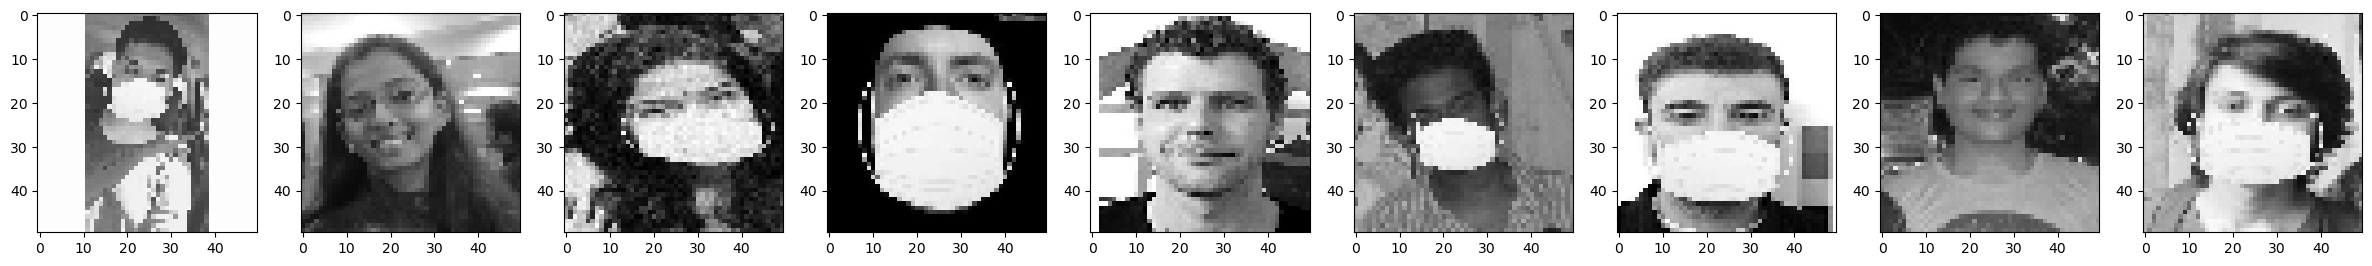

In [11]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,1403)], cmap='gray')

In [12]:
num_samples = trainx.shape[0]


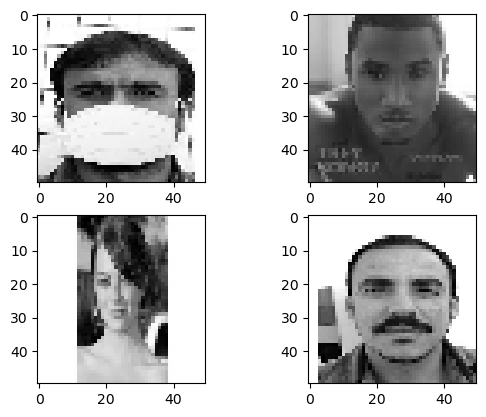

In [13]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0, num_samples)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0, num_samples)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0, num_samples)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0, num_samples)], cmap='gray')

plt.show()

In [14]:
trainy[0]

array([0., 1.])

In [15]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Assuming the shape of the images is (50, 50, 3)
img_shape = (50, 50, 3)

model = Sequential()

# Input layer with input shape
model.add(layers.InputLayer(shape=img_shape))

# Convolutional and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed it into the Dense layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))

# Output layer
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])




In [17]:
# Print model summary to verify the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,994 (1.54 MB)

 Trainable params: 404,994 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    x=trainx,
    y=trainy,
    batch_size=100,
    epochs=50,
    validation_split=0.2,
    verbose=2,
    shuffle=True
)


Epoch 1/50
12/12 - 4s - 309ms/step - accuracy: 0.5178 - loss: 0.6951 - val_accuracy: 0.4698 - val_loss: 0.6839
Epoch 2/50
12/12 - 1s - 82ms/step - accuracy: 0.5651 - loss: 0.6724 - val_accuracy: 0.5765 - val_loss: 0.6462
Epoch 3/50
12/12 - 1s - 83ms/step - accuracy: 0.7014 - loss: 0.5899 - val_accuracy: 0.7260 - val_loss: 0.4946
Epoch 4/50
12/12 - 1s - 82ms/step - accuracy: 0.8111 - loss: 0.4334 - val_accuracy: 0.8826 - val_loss: 0.3279
Epoch 5/50
12/12 - 1s - 88ms/step - accuracy: 0.9055 - loss: 0.2921 - val_accuracy: 0.8968 - val_loss: 0.2464
Epoch 6/50
12/12 - 1s - 93ms/step - accuracy: 0.9216 - loss: 0.2328 - val_accuracy: 0.9502 - val_loss: 0.1675
Epoch 7/50
12/12 - 1s - 88ms/step - accuracy: 0.9251 - loss: 0.2009 - val_accuracy: 0.9253 - val_loss: 0.1924
Epoch 8/50
12/12 - 1s - 82ms/step - accuracy: 0.9251 - loss: 0.2221 - val_accuracy: 0.9502 - val_loss: 0.1753
Epoch 9/50
12/12 - 1s - 84ms/step - accuracy: 0.9385 - loss: 0.1781 - val_accuracy: 0.9537 - val_loss: 0.1198
Epoch 10/

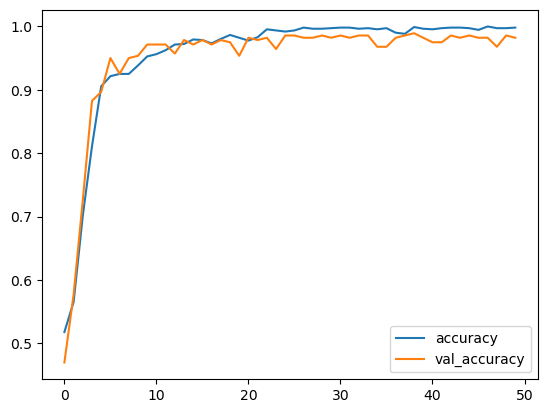

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [20]:
model.evaluate(testx, testy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9446 - loss: 0.2336


[0.21359628438949585, 0.9516128897666931]

In [21]:
model.save('cnn.keras')